# Introducción

El objetivo de esta práctica es mostrar al alumno las posibilidades que ofrece R para analizar datos de distintas fuentes diferentes, extraer datos, comparar, hacer gráficas y sacar estadísticos.

Las fuentes de datos que se tienen son:
* Datos meteorológicos de Praga de 1775 hasta 2004: https://www.ncdc.noaa.gov/cdo-web/datasets
* Banco mundial: https://data.worldbank.org/topic/climate-change
* Nivel de CO2 en la atmósfera (Mauna Loa): https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

Todos los ficheros necesarios para resolver la práctica se ofrecen como adjuntos.

## Datos meteorológicos NOAA

Carga el tiempo meteorológico de Praga en un data.frame. Fichero: *EZE00100082*

In [1]:
weatherPraga<-read.csv("./datos/EZE00100082.csv", sep = ",")

Mostrar los 10 años que más precipitiaciones han tenido junto con su valor correspondiente (columna PRCP):

In [2]:
head(weatherPraga[order(-weatherPraga$PRCP), c(2,55)],10)

,DATE,PRCP
165,1939,745.5
54,1828,665.4
228,2002,661.5
172,1946,638.3
116,1890,637.3
63,1837,634.9
184,1958,633.1
57,1831,625.7
192,1966,624.1
55,1829,622.4


* Muestra en un diagrama de dispersión la temperatura mínima registrada en un año (columna EMNT) en función del año registrado (columna DATE).
* Crear una regresión lineal (polinomio orden 1) que muestre la tendencia. Pintarla sobre el diagrama de dispersión.
* En media, ¿Cuantos grados ha aumentado la temperatura mínima cada año? (pendiente de la  regresión lineal)

In [3]:
library(ggplot2)

[1] "La temperatura minima ha aumentado  0.0174  grados cada año"


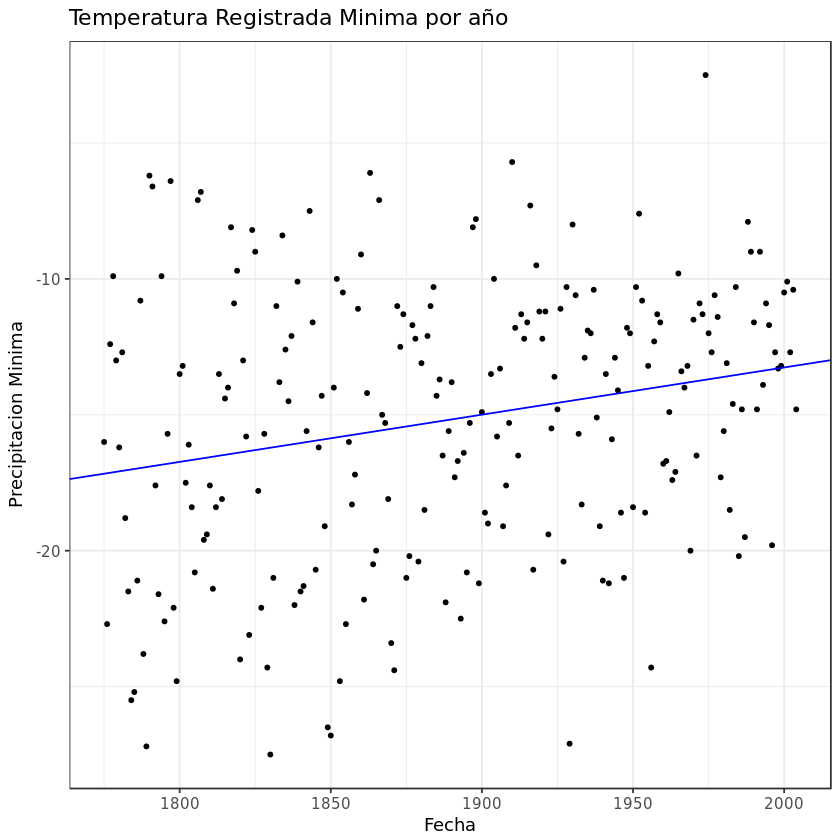

In [4]:
lm1 = lm(EMNT~DATE, data=weatherPraga)
ggplot(data = weatherPraga, aes(x=DATE, y=EMNT)) + 
geom_point(size=1) + 
theme_bw() + 
xlab("Fecha") + 
ylab("Precipitacion Minima") +
ggtitle("Temperatura Registrada Minima por año") + 
geom_abline(intercept=coef(lm1)[1], slope=coef(lm1)[2],colour="blue")
print(paste("La temperatura minima ha aumentado ", round(coef(lm1)[2], digits=4), " grados cada año"))

¿Ha subido realmente la temperatura mínima?
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1775,1794]
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1985,2004]
* ¿Cual es la diferencia entre ambos? ¿Es estadísticamente significativa?
  * Nota: antes de aplicar un test estadístico hay que ver si cumple con los requisitos de ese test.

In [5]:
subSet1 = subset(weatherPraga[,c("DATE","EMNT")], DATE>=1775 & DATE<=1794)
print(paste("La media del intervalo de años [1775,1794] es ", mean(subSet1$EMNT)))
subSet2 = subset(weatherPraga[,c("DATE","EMNT")], DATE>=1985 & DATE<=2004)
print(paste("La media del intervalo de años [1985,2004] es ", mean(subSet2$EMNT)))

[1] "La media del intervalo de años [1775,1794] es  -16.935"
[1] "La media del intervalo de años [1985,2004] es  -13.04"


In [6]:
paste("Las muestras del primer interalo parecen seguir una gaussiana.p-valor: ",
     shapiro.test(subSet1$EMNT)$p.value)
paste("Las muestras del segundo interalo parecen seguir una gaussiana.p-valor: ",
     shapiro.test(subSet2$EMNT)$p.value)

[1] "Las muestras del primer interalo parecen seguir una gaussiana.p-valor:  0.380826132704572"

[1] "Las muestras del segundo interalo parecen seguir una gaussiana.p-valor:  0.0751036246207044"

In [7]:
var(subSet1$EMNT)
var(subSet2$EMNT)
t.test(subSet1$EMNT, subSet2$EMNT, var.equal = FALSE)
paste('El valor por debajo de 0.05 de p-value, confirma que la media de ambos grupos son distintas')

[1] 42.38661

[1] 12.55937


	Welch Two Sample t-test

data:  subSet1$EMNT and subSet2$EMNT
t = -2.3499, df = 29.351, p-value = 0.02571
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.2832043 -0.5067957
sample estimates:
mean of x mean of y 
  -16.935   -13.040 


[1] "El valor por debajo de 0.05 de p-value, confirma que la media de ambos grupos son distintas"

## Datos banco mundial

Carga los datos del banco mundial

In [8]:
databank<-read.csv("./datos/API_19_DS2_en_csv_v2.csv",skip=4)
#Borramos las X del nombre de la columna
colnames(databank)<-gsub("X","",colnames(databank))

countryData<-read.csv("./datos/Metadata_Country_API_19_DS2_en_csv_v2.csv")

# De esta forma podremos aceder a la información de paises usando su countryCode
rownames(countryData)<-countryData$Country.Code

realCountryData<-subset(countryData,IncomeGroup!="")
regionData<-subset(countryData,IncomeGroup=="")
print(paste("Tenemos un total de",nrow(realCountryData),"paises"))
print(paste("Tenemos un total de",nrow(regionData),"regiones"))
indicators<-read.csv("./datos/Metadata_Indicator_API_19_DS2_en_csv_v2.csv")
print(paste("Tenemos un total de",nrow(indicators),"indicadores"))

[1] "Tenemos un total de 217 paises"
[1] "Tenemos un total de 46 regiones"
[1] "Tenemos un total de 80 indicadores"


¿Cual fue el país que más toneladas de CO2 equivalente emitió en 1970 (Mostrar *Country.Name*)?
¿Cuanto contaminó?

Hay una dataframe con la lista de pasises en *realCountryData*
El número de toneladas de CO2 equivalente viene dado por el Indicator.Code *"EN.ATM.GHGT.KT.CE"*


In [9]:
subsetDatabank <- subset(databank, Indicator.Code == 'EN.ATM.GHGT.KT.CE', c('Country.Name','Country.Code', '1970', '2012'))
realCountryData$X <- NULL
mergeData <- merge(subsetDatabank, realCountryData, by.x = 'Country.Code', by.y = 'Country.Code', sort=F,all.x=F,all.y=T)
sinNA1970 <- subset(mergeData, !is.na(mergeData$'1970'), c('Country.Name', 'Country.Code', '1970'))
resultMax <- sinNA1970[which.max(sinNA1970$'1970'),]
resultMax$'Country.Name'
resultMax$'1970'

[1] United States
264 Levels: Afghanistan Albania Algeria American Samoa Andorra ... Zimbabwe

[1] 5400504

¿Cuales fueron los 5 países que más toneladas de CO2 equivalente emitieron en 2012? ¿Cuantas kt emitieron?

In [10]:
sinNA2012 <- subset(mergeData, !is.na(mergeData$'2012'), c('Country.Name', 'Country.Code', '2012'))
head(sinNA2012[order(-sinNA2012$'2012'), c('Country.Name', '2012')],5)

,Country.Name,2012
37,China,12454711
204,United States,6343841
90,India,3002895
27,Brazil,2989418
166,Russian Federation,2803398


¿Cual ha sido la media del **porcentaje** de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012?

In [11]:
subsetCHN <- subset(databank, Country.Name == 'China' & Indicator.Code == 'EN.ATM.GHGT.KT.CE', c('Country.Name','Country.Code', '2000' : '2012'))
value <- as.numeric(subsetCHN[c(3:length(subsetCHN))])
ratio<-c(NA,value[2:length(value)]/value[1:length(value)-1])
rate<-(ratio-1)*100
print(paste(round(mean(rate, na.rm=T), 2), "%"))

[1] "7.82 %"


Compara las emisiones de CO2(kt) per cápita (clave en Indicator.Code: *EN.ATM.CO2E.PC*) de todos los paises en 1960,1990 y 2017 mediante:
* diagrama de cajas
* histograma
* curvas de densidad

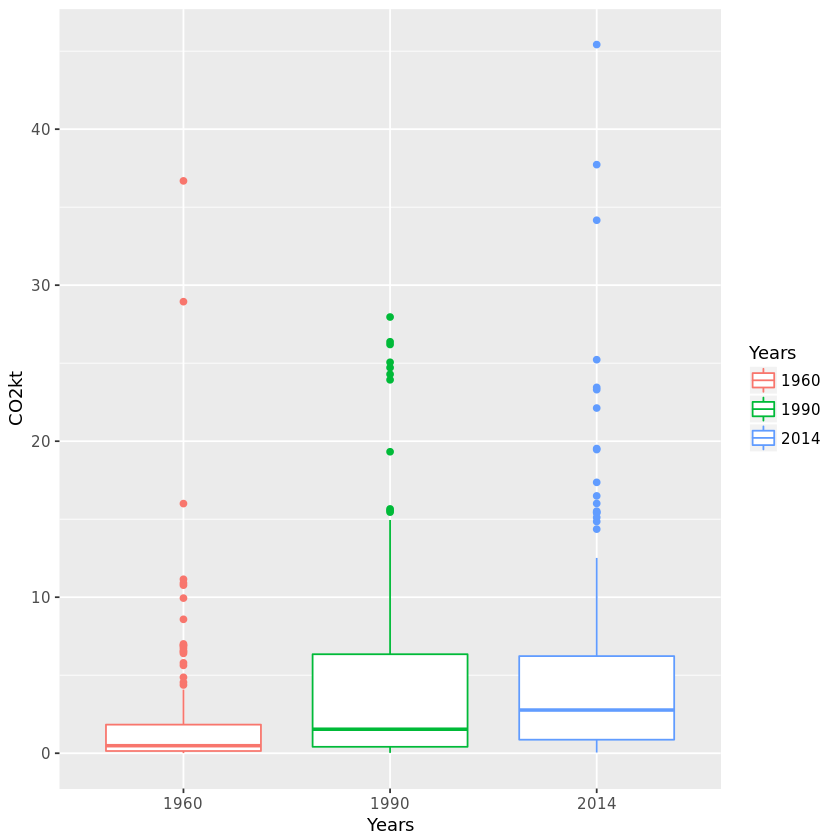

In [12]:
subsetDatabank_CO2_PC <- subset(databank,Indicator.Code == 'EN.ATM.CO2E.PC', c('Country.Name','Country.Code', '1960', '1990', '2014'))
mergeDataCO2_PC <- merge(subsetDatabank_CO2_PC, realCountryData, by.x = 'Country.Code', by.y = 'Country.Code', sort=F,all.x=F,all.y=T)
data_bp <- mergeDataCO2_PC[, c('1960', '1990', '2014')]
ggplot(data= subset(stack(data_bp), !is.na(values)), aes(x=ind, y=values, colour=ind)) +
geom_boxplot() +
labs(x = "Years", y="CO2kt", color="Years")

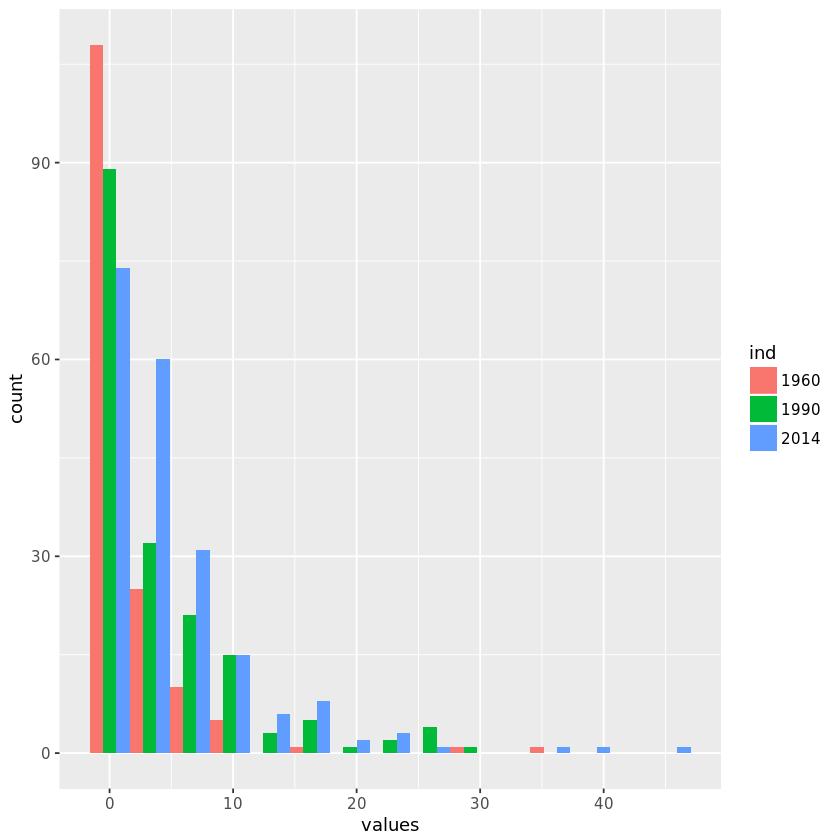

In [13]:
ggplot(data= subset(stack(data_bp), !is.na(values)), aes(values, fill=ind)) + 
geom_histogram(position = 'dodge', bins=15)

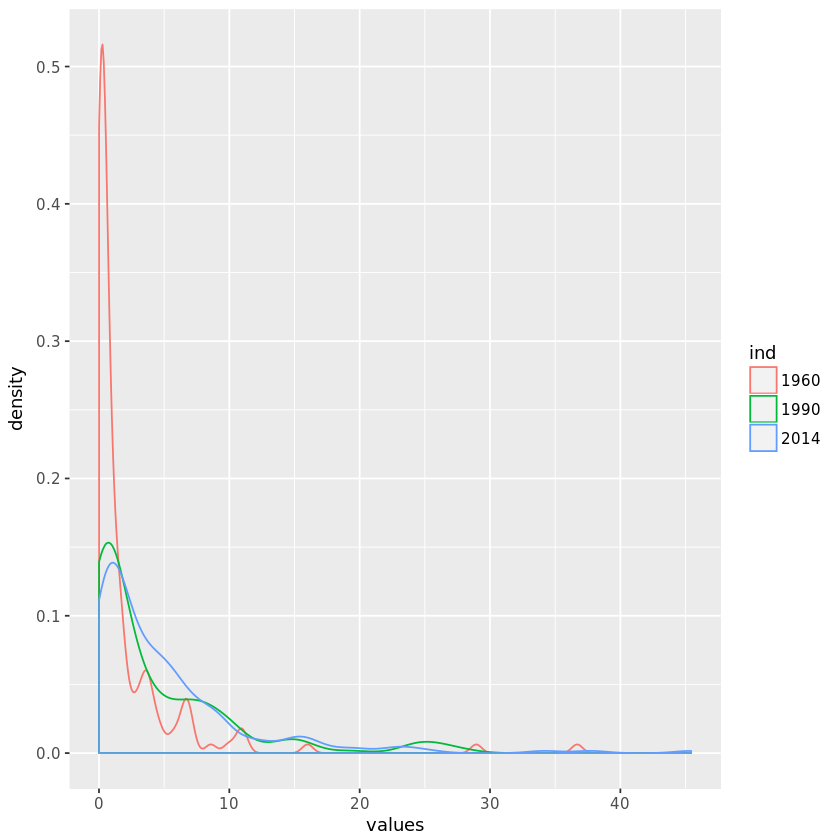

In [14]:
ggplot(data= subset(stack(data_bp), !is.na(values)), aes(x=values, colour=ind)) + 
geom_density()

Utilizando ggplot: Compara en una gráfica las emisiones totales de CO2(kt) en función del año de las siguientes regiones:
* Mundo entero: WLD
* Unión europea: EUU
* Africa subsahariana: SSA
* Norteamérica: NAC
* Este de Asia y pacífico: TEA

Ayuda: Tendrás que usar la función *melt()* para transformar los años, cada año en una columna, en un data.frame donde cada uno esté en una fila.

In [15]:
#Eliminamos Columna vacia de databank
databank <- databank[, c(1:ncol(databank) - 1)]

In [16]:
databankCO2 <- subset(databank, Indicator.Code == 'EN.ATM.CO2E.PC' & 
       (Country.Code == 'WLD' | Country.Code == 'EUU' | Country.Code == 'SSA' |
       Country.Code == 'NAC' | Country.Code == 'TEA'))

In [17]:
regionDataCO2 <- merge(regionData, databankCO2, by="Country.Code")

In [18]:
require(reshape2)

Loading required package: reshape2


In [19]:
regionDataCO2_melted <- melt(regionDataCO2, value.name = 'CO2kt', variable.name = 'Year')

Using Country.Code, Region, IncomeGroup, SpecialNotes, TableName, X, Country.Name, Indicator.Name, Indicator.Code as id variables


Warning message:
“Removed 15 rows containing missing values (geom_point).”

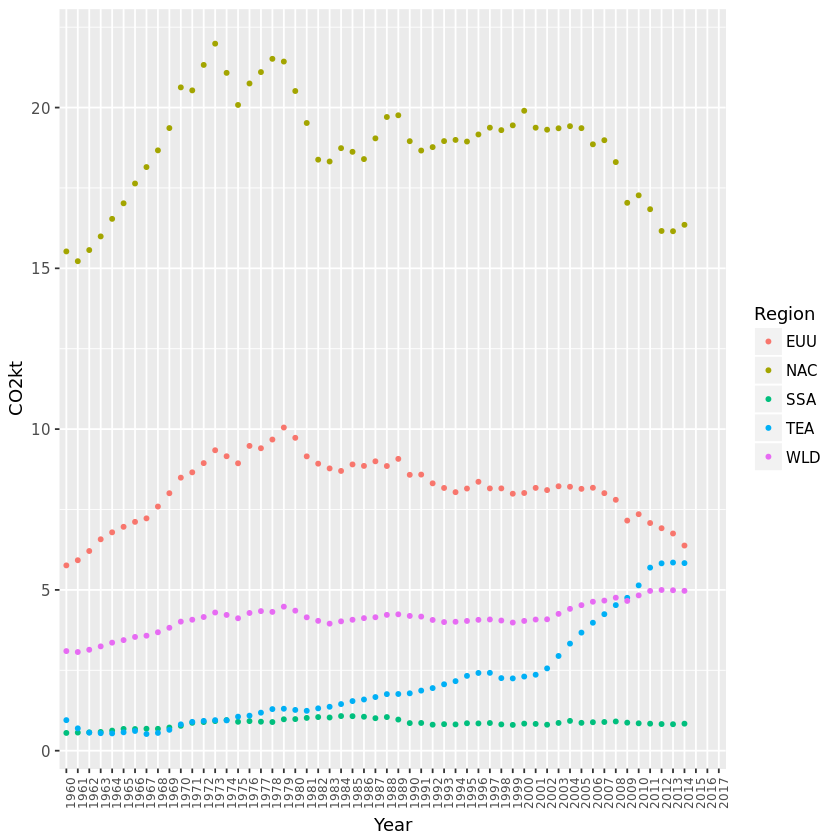

In [20]:
ggplot(data = regionDataCO2_melted, aes(x=Year,y=CO2kt, color=factor(regionDataCO2_melted$Country.Code))) + 
geom_point(size = 1) +
theme(axis.text.x=element_text(angle=90,hjust=1, size=7)) +
#scale_x_discrete(breaks=10) +
labs(color="Region")

Suponiendo que la tendencia se mantiene, es decir, que no se aplica ninguna política a nivel global de reducción de emisiones de CO2, ¿cual sería el total de emisiones de CO2 en todo el mundo en el año 2020?

Para calcularlo utiliza tres modelos lineales:
* Regresión lineal con polinomio grado 1
* Regresión lineal polinomio grado 3
* Regresión lineal polinomio grado 10

Represénta en una gráfica el valor real y el calculado por cada uno de los 3 modelos.

Warning message:
“Removed 1 rows containing missing values (geom_point).”

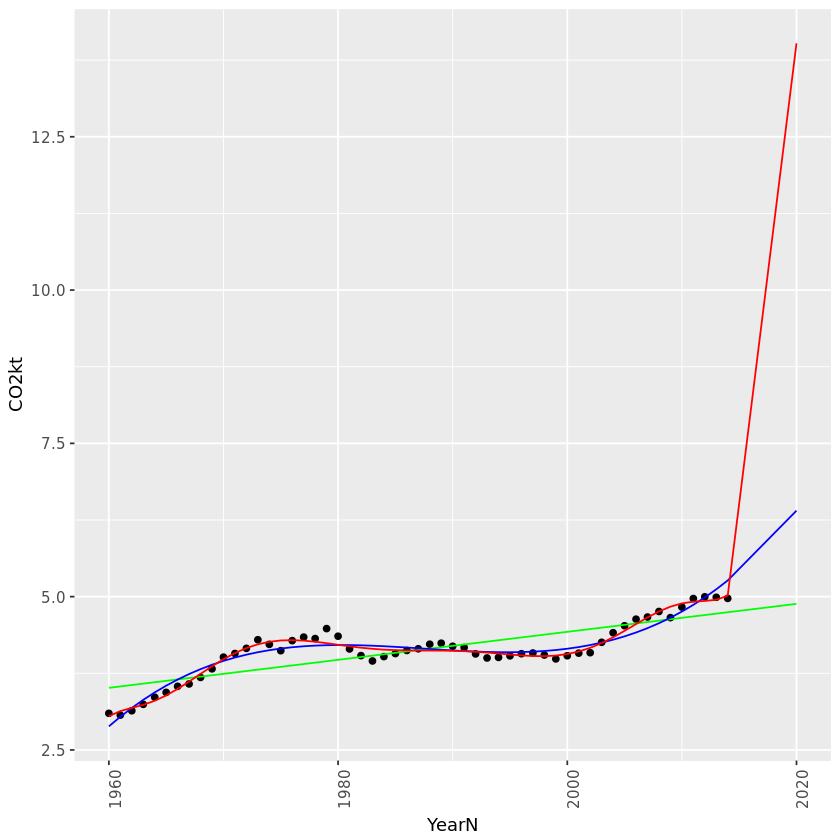

In [21]:
regionDataCO2_meltedWLD <- subset(regionDataCO2_melted,Country.Code == 'WLD' & !is.na(CO2kt))
regionDataCO2_meltedWLD$YearN <- as.numeric(as.character(regionDataCO2_meltedWLD$Year))
regionDataCO2_meltedWLD[nrow(regionDataCO2_meltedWLD)+1, 'YearN']  <- 2020
model1 <- lm(data = regionDataCO2_meltedWLD, CO2kt ~ poly(YearN,1))
regionDataCO2_meltedWLD$predicted1 <- predict(model1, regionDataCO2_meltedWLD)
model3 <- lm(data = regionDataCO2_meltedWLD, CO2kt ~ poly(YearN,3))
regionDataCO2_meltedWLD$predicted3 <- predict(model3, regionDataCO2_meltedWLD)
model10 <- lm(data = regionDataCO2_meltedWLD, CO2kt ~ poly(YearN,10))
regionDataCO2_meltedWLD$predicted10 <- predict(model10, regionDataCO2_meltedWLD)
ggplot(data=regionDataCO2_meltedWLD, aes(x=YearN)) + 
geom_point(aes(y=CO2kt)) + 
geom_line(aes(y=predicted1), color = 'green') +
geom_line(aes(y=predicted3), color = 'blue') +
geom_line(aes(y=predicted10), color = 'red') +
theme(axis.text.x=element_text(angle=90,hjust=1))

## Nivel de CO2

En esta parte vamos a trabajar con el nivel medio de CO2 medido por el NOAA en Manuna Loa (Hawai) desde 1968.

In [22]:
co2ppm<-read.csv("./datos/co2_mm_mlo.txt",skip=73,sep="",header = F, 
                 col.names= c("year","month","date","average","interpolated","trend","days"))

Representa el diagrama de dispersión entre:
* CO2 medido en la atmósfera (co2ppm\$interpolated)
* CO2 emitido por todos los países (databank con Indicator.Code=="EN.ATM.CO2E.KT" y Country.Code=="WLD"?

¿Cual es su correlación?


Nota: 

* Los valores en co2ppm vienen en meses, habrá que agregarlos, calcular la media anual a partir de los meses para así poder hacer la correlación con databank.
* Los valores en databank vienen en columnas, habrá que pasarlos a filas utilizando la función *melt*.

Using Country.Name, Country.Code, Indicator.Name, Indicator.Code as id variables
Warning message:
“Removed 5 rows containing missing values (geom_point).”

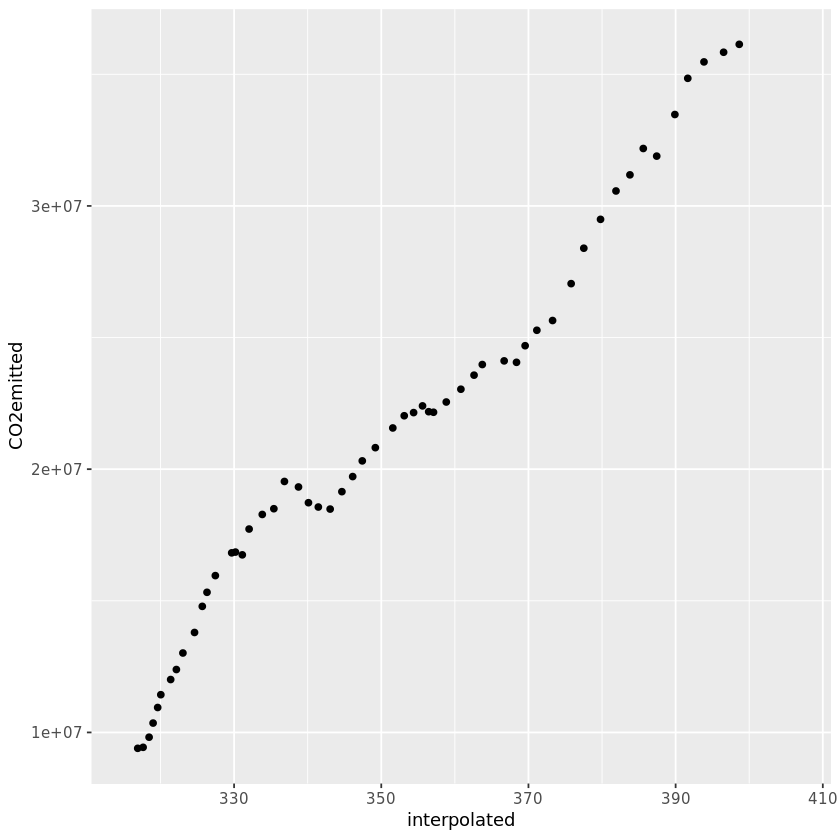

In [23]:
co2ppmAggregated <- aggregate(co2ppm$interpolated, list(Year = co2ppm$year), mean)
colnames(co2ppmAggregated)[2] <- 'interpolated'

subsetDatabankCO2 <- subset(databank, Indicator.Code == 'EN.ATM.CO2E.KT' & Country.Code == 'WLD')
subsetDatabankCO2_melted <- melt(subsetDatabankCO2, value.name = 'CO2emitted', variable.name = 'Year')
subsetDatabankCO2_melted  <- subsetDatabankCO2_melted[,c('Year', 'CO2emitted')]

dataCO2merged <- merge(co2ppmAggregated, subsetDatabankCO2_melted, by.x = 'Year', by.y = 'Year', sort=F,all.x=T,all.y=T)

ggplot(data=dataCO2merged, aes(x=interpolated)) + 
geom_point(aes(y=CO2emitted))

In [24]:
cor(dataCO2merged$interpolated, dataCO2merged$CO2emitted, use='complete.obs')
paste("Tanto la grafica como la correlacion (casi 1), nos indica la fuerte relacion existente entre ambas emisiones")

[1] 0.9845578

[1] "Tanto la grafica como la correlacion (casi 1), nos indica la fuerte relacion existente entre ambas emisiones"

Calcular la matriz de correlación de las siguientes variables:
* Cantidad de CO2 en la atmósfera
* Emisiones totales CO2 en la atmósfera
* Temperatura mínima en praga (columna EMNT).

In [25]:
weatherPragaMergeCO2 <- merge(dataCO2merged, weatherPraga[, c('DATE', 'EMNT')], by.x = 'Year', by.y = 'DATE', sort=F,all.x=T,all.y=T)

In [26]:
cor(weatherPragaMergeCO2[ ,c('interpolated', 'CO2emitted', 'EMNT')], use = 'complete.obs')

,interpolated,CO2emitted,EMNT
interpolated,1.0000000,0.9703198,0.1783153
CO2emitted,0.9703198,1.0000000,0.2254552
EMNT,0.1783153,0.2254552,1.0000000
